In [1]:
# Retail E-Commerce Sales Performance Analysis
# ============================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [3]:
# 1. Load Dataset
# --------------------------------------------

# Use relative path for GitHub
file_path = r"D:\data analytics- projects\Retail e-commerce project\Online Sales Data.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


In [4]:
# 2. Basic Data Exploration
# --------------------------------------------

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Records:", df.duplicated().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB

Missing Values:
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

Duplicate Records: 0


In [6]:
# 3. Data Cleaning
# --------------------------------------------
df.drop_duplicates(inplace=True)

# Fill missing numeric values if any
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

print("\nData Cleaning Completed")


Data Cleaning Completed


In [10]:
# KPI Calculations
total_revenue = df['Total Revenue'].sum()
total_transactions = df['Transaction ID'].nunique()
avg_units_sold = df['Units Sold'].mean()
avg_order_value = total_revenue / total_transactions

print("\n--- KPI Summary ---")
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Units Sold per Order: {avg_units_sold:.2f}")
print(f"Average Order Value: ₹{avg_order_value:,.2f}")


--- KPI Summary ---
Total Revenue: ₹80,567.85
Total Transactions: 240
Average Units Sold per Order: 2.16
Average Order Value: ₹335.70


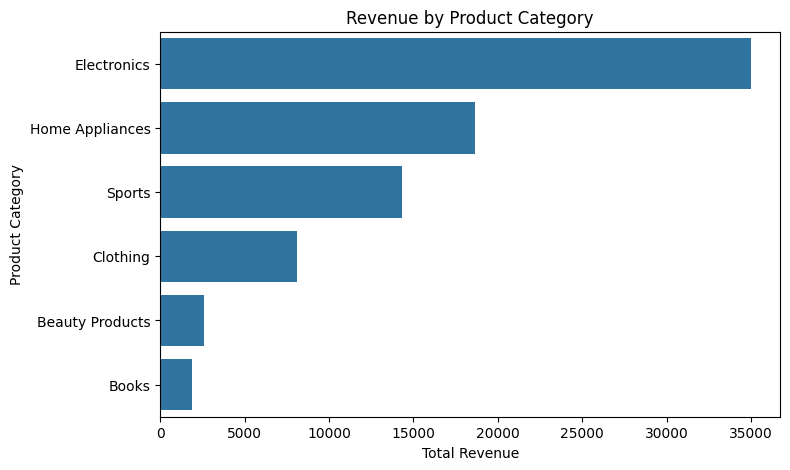

In [12]:
# 6. Product Category Analysis
# --------------------------------------------

category_sales = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()


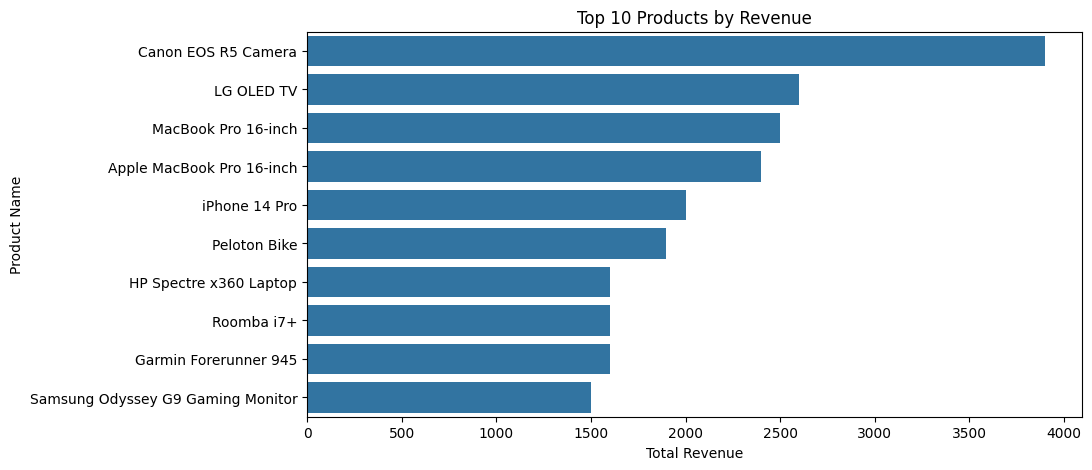

In [13]:
# 7. Top 10 Best-Selling Products
# --------------------------------------------

top_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

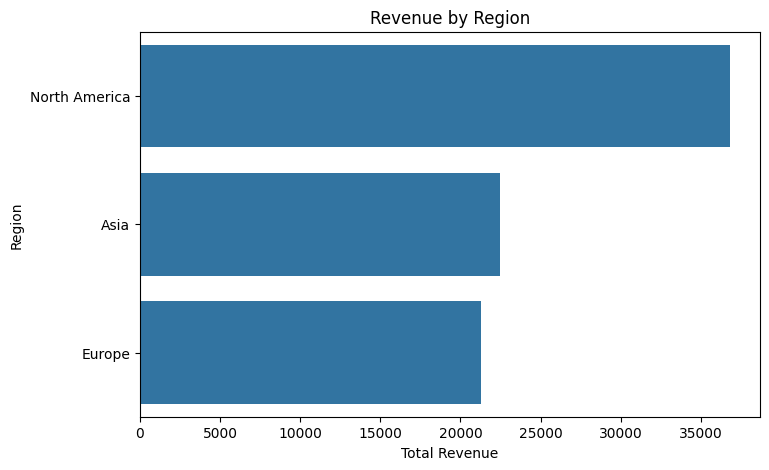

In [14]:
# 8. Region-wise Sales Analysis
# --------------------------------------------

region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title("Revenue by Region")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.show()

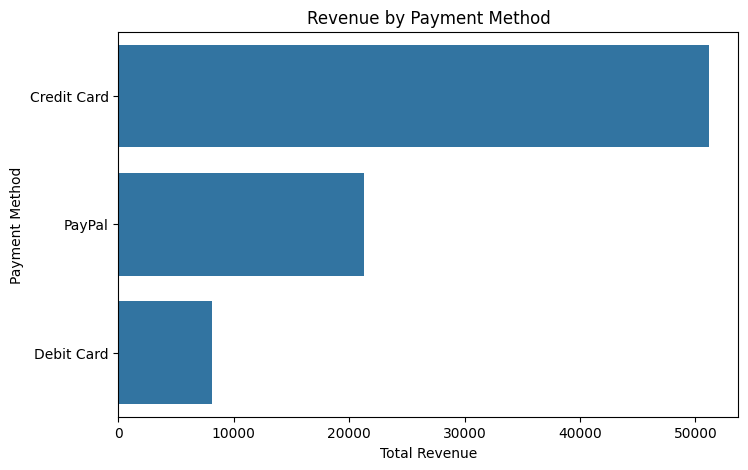

In [15]:
# 9. Payment Method Analysis
# --------------------------------------------

payment_sales = df.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=payment_sales.values, y=payment_sales.index)
plt.title("Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()

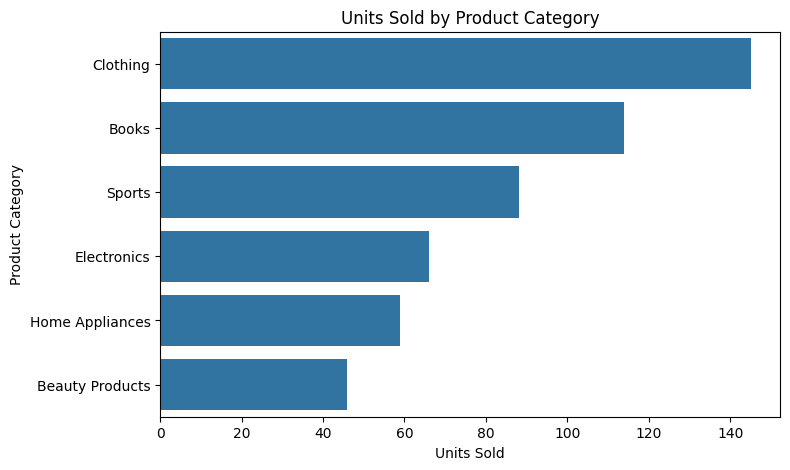

In [16]:
# 10. Units Sold Analysis
# --------------------------------------------

units_by_category = df.groupby('Product Category')['Units Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=units_by_category.values, y=units_by_category.index)
plt.title("Units Sold by Product Category")
plt.xlabel("Units Sold")
plt.ylabel("Product Category")
plt.show()

In [17]:
# 11. Business Insights
# --------------------------------------------

print("\n--- Key Business Insights ---")
print("• Certain product categories generate the highest revenue.")
print("• Sales show clear monthly seasonality.")
print("• Few products contribute significantly to total revenue.")
print("• Regional analysis highlights high-performing markets.")
print("• Digital payment methods dominate revenue contribution.")

print("\nAnalysis Completed Successfully")


--- Key Business Insights ---
• Certain product categories generate the highest revenue.
• Sales show clear monthly seasonality.
• Few products contribute significantly to total revenue.
• Regional analysis highlights high-performing markets.
• Digital payment methods dominate revenue contribution.

Analysis Completed Successfully
